Our task is to build a binary classifier which predicts whether a given sample of water is safe for drinking or not. The quality of the water is being determined by the chemical constraints of water such as copper, chromium, etc. and we are using the same dataset which holds all related information. 

The following steps are to be taken to address this binary classification problem using neural networks.    

Step 1: Load and read the dataset

All concerned data is stored in a CSV file and using the pandas library we will load the dataset into the system and will have an initial brief by looking at the first 5 rows of it.   

In [1]:
# Importing pandas to read data
import pandas as pd
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In the above brief, we can see that data have all the relevant features that can be used for classification.

Next, Let’s check the shape of the data

In [2]:
# Shape of the data
data.shape

(7996, 21)

The data has around 8000 samples of water and there are a total of 21 features based on the quality of the water to be assessed.  

Step 2: Data preprocessing

In the initial brief of data, the data looks pretty well but it is necessary to check whether data have any null values, how the outcome classes are spread, etc. 

Now let’s first check whether the data have any null values. 

In [3]:
# Checking null values in dataset
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

We can see in the above output that there are no null values present in the dataset, now let’s check the distribution of target variables which we are going to predict. 

In [6]:
# Counting labels
data['is_safe'].value_counts(normalize=True)

0    0.885943
1    0.114057
Name: is_safe, dtype: float64

There are two classes in the target variable, 0 indicates that the particular sample of water is not safe for human consumption whereas 1 indicates that the sample is safe for human consumption. 88.59% of the samples belong to class 0 and the rest 11.40% of samples belong to class 1. 

Now let’s define the input and output features. From the dataset, the first 20 columns will be the input features and the last outcome column will be the output feature.

In [7]:
# Defining input and output features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
# Checking shape of input-output features
print(X.shape)
print(y.shape)

(7996, 20)
(7996,)


We have successfully separated the data. Let’s take a closer look at input patterns to check how it is spread. 

In [10]:
X

array([[1.650e+00, 9.080e+00, 4.000e-02, ..., 8.000e-02, 3.400e-01,
        2.000e-02],
       [2.320e+00, 2.116e+01, 1.000e-02, ..., 8.000e-02, 2.700e-01,
        5.000e-02],
       [1.010e+00, 1.402e+01, 4.000e-02, ..., 7.000e-02, 4.400e-01,
        1.000e-02],
       ...,
       [9.000e-02, 6.850e+00, 0.000e+00, ..., 0.000e+00, 4.000e-02,
        5.000e-02],
       [1.000e-02, 1.000e+01, 1.000e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e-02, 6.850e+00, 1.000e-02, ..., 0.000e+00, 4.000e-02,
        5.000e-02]])

As we can see the feature values are not in range and especially neural networks are highly sensitive to these kinds of feature distribution. So let’s scale all values using a Standard scaler from the sklearn library. 

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [12]:
#The standard scaler scales the values based on a standard deviation of each feature.
X

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.63921743, ..., -1.72683135,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -0.59963176, ..., -1.72683135,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.59963176, ..., -1.72683135,
        -0.75098648,  0.19802266]])

Above we can see how values are spared in one range for each feature.

The input training patterns have 20 features to train which is a pretty high number of features to train the model, below by using PCA we will determine whether we can reduce the number of features. 

In [13]:
# Fitting PCA to analyze components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

We have fitted the PCA model on our training dataset, let’s obtain the variance vs component plot to check how many features explain more than 90% variance. 

Text(0.5, 1.0, 'Scree plot')

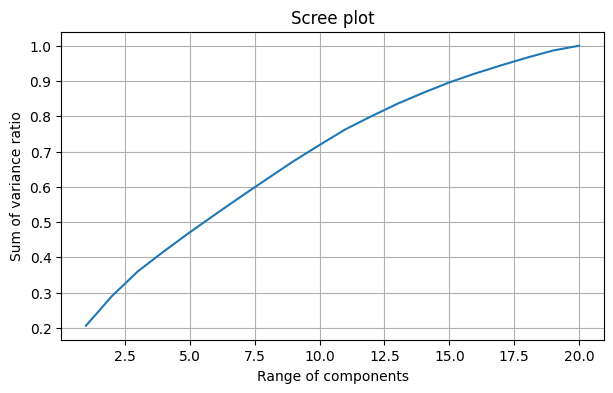

In [14]:
# Variance Vs Component plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,21,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')

From the Scree plot, we can see that the original features would be the only optimal features to be preserved while training. 

Let's create the training and testing patterns. The training patterns will be used to train the model and the testing pattern will be used to evaluate the performance of the neural network. 

In [15]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

So out of nearly 8000 samples, we are using 80% of the data in the training dataset and the remaining 20% will be preserved to evaluate the model. Let's check how many samples we have in the respective phases.

In [20]:
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6396, 20)
(6396,)
(1600, 20)
(1600,)


So for training, we have nearly 6396 samples and to evaluate the model we have 1600 samples. 

Step 3: Defining the neural net classifier

In this section, we are going to build the neural network using the functional API of Keras. Let’s import all dependencies required to build the model.

In [21]:
# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense

We will create the sequential model, where we will cover all layers of the network like input, hidden and output layers. Our model will be the only three-layer model which can be defined as shown below. 

In [22]:
# Defining the neural network model
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
#model.add(Dense(48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# Summary of the neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365 (1.43 KB)
Trainable params: 365 (1.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


As we can see the model has three layers, the neurons for the first two layers are fired according to the Relu activation function and the neurons of the last output layer are fired according to the sigmoid function. 

Now let’s compile the model with loss function and optimizer and also accuracy metrics to check how accuracies are being evolved during the training. 

In [24]:
# Compiling the classifier
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Step 4: Training the neural net classifier

We are now good to go to train our network. In the .fit() method we pass the training dataset number of epochs and batch size. 

In [25]:
# Training the classifier
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100


640/640 [==============================] - 2s 2ms/step - loss: 0.3959 - accuracy: 0.8596
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8857
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8857
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2772 - accuracy: 0.8857
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.8860
Epoch 6/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.8931
Epoch 7/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2357 - accuracy: 0.9029
Epoch 8/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2252 - accuracy: 0.9090
Epoch 9/100
640/640 [==============================] - 2s 2ms/step - loss: 0.2163 - accuracy: 0.9118
Epoch 10/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2085 - accu

Epoch 77/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0956 - accuracy: 0.9628
Epoch 78/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9622
Epoch 79/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9631
Epoch 80/100
640/640 [==============================] - 2s 2ms/step - loss: 0.0944 - accuracy: 0.9645
Epoch 81/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9628
Epoch 82/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9639
Epoch 83/100
640/640 [==============================] - 2s 2ms/step - loss: 0.0945 - accuracy: 0.9628
Epoch 84/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0928 - accuracy: 0.9650
Epoch 85/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9631
Epoch 86/100
640/640 [==============================] - 1s 2ms/step - loss: 0.0939

At the 100th epoch, the model the loss is 0.08 and the accuracy is 96.53%. Let’s plot the accuracy and training curve for all 100 epochs. 

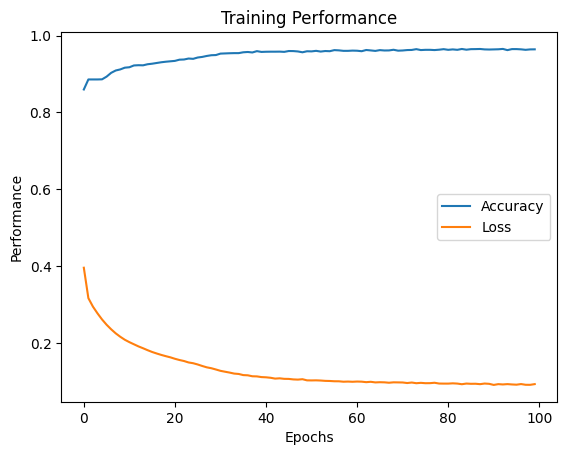

In [26]:
# Plotting the performance
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.title('Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

As we can see the initial loss was 0.4 units and till the 100 epochs loss was reduced to 0.08 units similarly accuracy is boosted from 80% to 95%. 

Step 5: Predicting class labels

We have trained the model, now let’s obtain the prediction on the testing dataset,  

In [27]:
# Making predictions with the trained classifier
predictions = model.predict(X_test)
predictions

50/50 [==============================] - 0s 2ms/step


array([[3.7496116e-02],
       [7.0517159e-01],
       [9.4500754e-04],
       ...,
       [4.1823656e-09],
       [3.5266847e-05],
       [7.1146491e-07]], dtype=float32)

The obtained predictions are in the form of probabilities, let’s round these probabilities.

In [28]:
# Rounding off the predictions
y_pred = [round(x[0]) for x in predictions]
y_pred

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score( y_test, y_pred))

0.944375


From the above-predicted class, we can not assess the performance of the model, in the next step will assess the model on various performance metrics. 

 

Step 6: Evaluating the performance

Let’s obtain the confusion metrics between the predicted and true labels. 

In [32]:
# Confusion matrix of predictions on test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1376,   43],
       [  46,  135]], dtype=int64)

The total of predicted true labels is 1385 + 135 = 1520 and false predicted labels are 34 + 46 = 80. 

For better interpretation, Let’s visualize the above confusion using a heat map. 

C:\Users\mehta\AppData\Local\Temp\ipykernel_292\1752795509.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\mehta\AppData\Local\Temp\ipykernel_292\1752795509.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


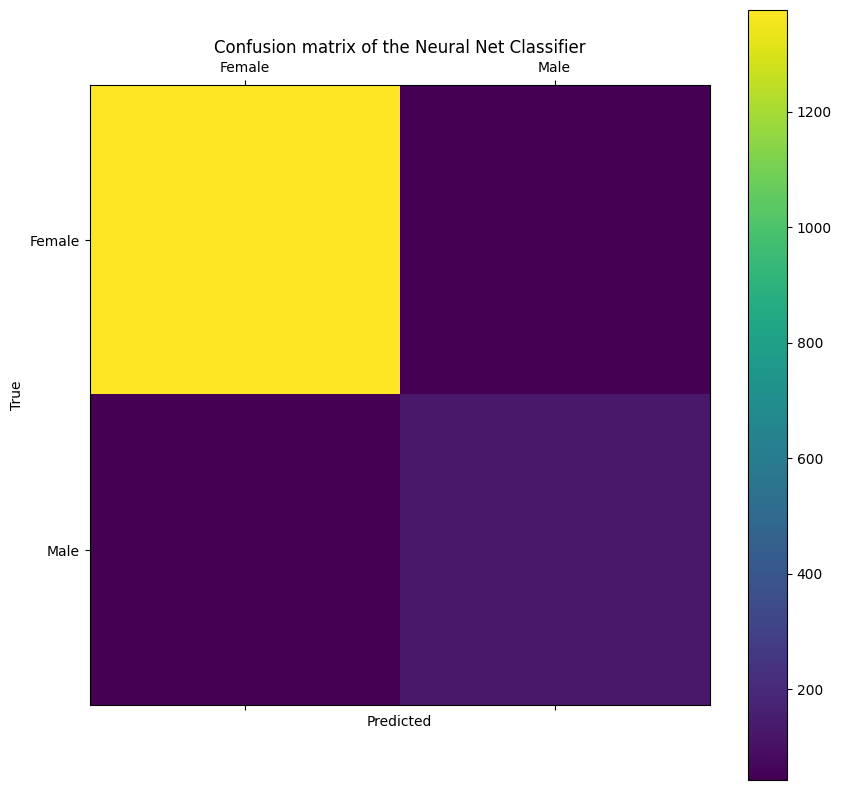

In [33]:
# Plotting the confusion matrix
import sys
from pylab import *
cm = confusion_matrix(y_test, y_pred)
labels = ['Female', 'Male']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Neural Net Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Now finally evaluate our classifier performance using a classification report where the prediction will be well evaluated with various performance measures such as precision, recall, and f-1 score. m

In [35]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1419
           1       0.76      0.75      0.75       181

    accuracy                           0.94      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.94      0.94      0.94      1600



As we can see the neural network has been well evaluated on performance metrics and has given satisfactory scores.

So this is how we can address the classification problem in Neural networks on a real-world dataset. 